In [19]:
#Resposta questão 1
##Versão Python -> 3.12.7
##Ambiente do projeto -> Anaconda


Python 3.12.7


In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns


# Replace 'your_database_file' with the actual path to your database file
# For example, if it's a CSV file, use 'your_database_file.csv'
file_path = 'data\\Country-data.csv'

# Load the database into a DataFrame
# Change the method based on the file type (e.g., read_csv, read_excel, read_sql)
df = pd.read_csv(file_path)  # For CSV files



In [4]:
#Resposta questão 2.1 -> Dataset carregado
#Resposta questão 2.2 -> Quantos países existem no dataset --> 167
# Group by the 'country' column and count the occurrences
unique_countries = df['country'].nunique()

# Print the grouped DataFrame
print(unique_countries)

167


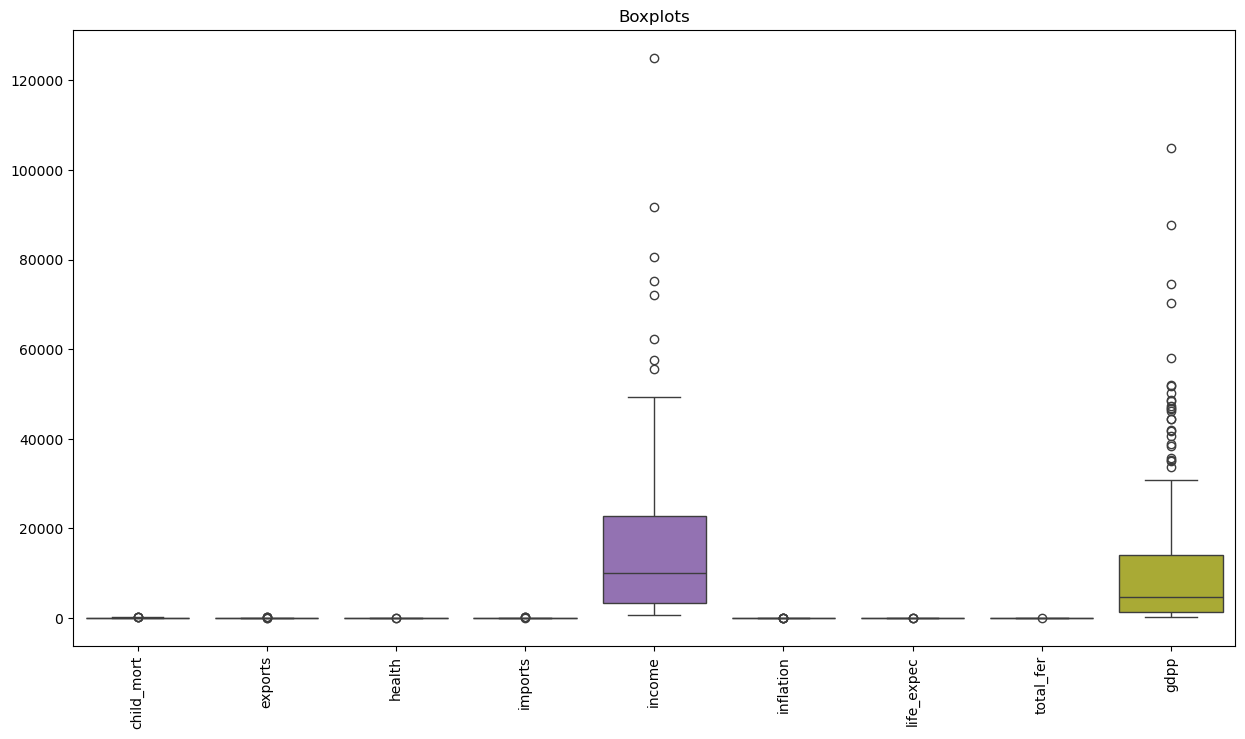

In [7]:
#Resposta questão 2.3 -> Através do boxplot notamos uma variação dinâmica grande entre as faixas de variáveis e domínios incompatíveis
#é necessário analisar remover possíveis outliers, tratar os campos strings e padronizar os dados

plt.figure(figsize=(15,8))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title("Boxplots")
plt.show()
df_features=df.drop("country", axis=1)

In [9]:
#Resposta questão 2.4 -> Foi realizado o pre processamento dos dados
from sklearn.preprocessing import StandardScaler

print(df_features.isnull().sum())
scaler= StandardScaler()
df_scaled=scaler.fit_transform(df_features)

child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64


In [11]:
# Resposta questão 3.1.a)
## Foi utilizado a clusterização dos dados via Kmeans, resultando em 3 grupos

# Definir o número de clusters
k = 3

# Aplicar o K-Means
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(df_scaled)



C:\Users\paulo.rogerio\AppData\Local\anaconda3\envs\sklearn_extra_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\paulo.rogerio\AppData\Local\anaconda3\envs\sklearn_extra_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [13]:
#Resposta questão 3.2
## É percebido que os 3 grupos se diferem principalmente pelos 3 atributos renda per capita, pib e a taxa de mortalidade infantil
## Esses valores tem variações abaixo da média, próximo da média e muito acima da média. Os países que melhor representam cada agrupamento
## foram selecionados, considerando a menor distância Euclidiana entre cada cluster. 

# Inicializar o modelo de K-Vizinhos Mais Próximos
knn = NearestNeighbors(n_neighbors=1, metric='euclidean')

# Ajustar o modelo aos dados padronizados
knn.fit(df_scaled)

features = df.drop(['country'], axis=1)

# Obter os centroides
centroids = kmeans.cluster_centers_
centroids_df = pd.DataFrame(centroids, columns=features.columns)


# Encontrar o país mais próximo de cada centroide
nearest_countries = []
for i in range(k):
    centroid = centroids[i].reshape(1, -1)
    distance, index = knn.kneighbors(centroid)
    country_index = index[0][0]
    country_name = df.loc[country_index, 'country']
    nearest_countries.append({
        'Cluster': i,
        'Country': country_name,
        'Distance_to_Centroid': distance[0][0]
    })

#Agrupamentos encontrados
display(centroids_df)

# Criar um DataFrame com os resultados
nearest_countries_df = pd.DataFrame(nearest_countries)
#Países que melhor representam cada cluster usando K-Vizinhos Mais Próximos

display(nearest_countries_df)






,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,-0.827449,0.645080,0.727411,0.190639,1.484243,-0.484921,1.079579,-0.791877,1.615995
1,1.360218,-0.437533,-0.155984,-0.189204,-0.686894,0.402111,-1.282180,1.364944,-0.604242
2,-0.406453,-0.031653,-0.224471,0.024162,-0.251770,-0.017167,0.254734,-0.424343,-0.354481


,Cluster,Country,Distance_to_Centroid
0,0,Iceland,0.731764
1,1,Guinea,0.829088
2,2,Jamaica,0.734379


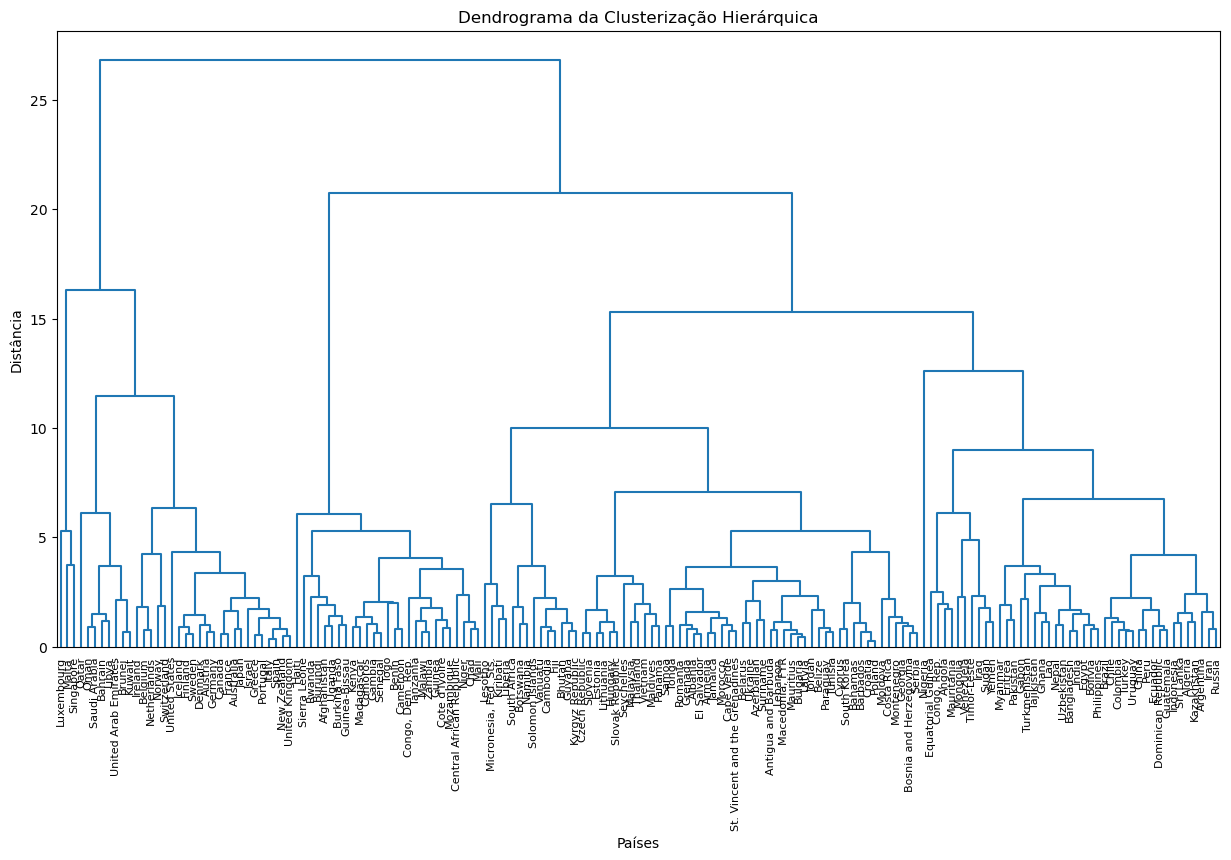

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_Hierarchical
63,Guinea,1.759101,-0.395501,-0.688559,-0.152886,-0.830097,0.789274,-1.416081,1.584856,-0.673981,2
68,Iceland,-0.887138,0.449729,0.943661,-0.148743,1.126692,-0.219360,1.290735,-0.495567,1.583465,1
143,Suriname,-0.352419,0.416798,0.070953,-0.351751,-0.153208,-0.055208,-0.028838,-0.283550,-0.255238,3


In [15]:
#Resposta questão 3.1.b -> Foi realizado a clusterização hierárquica 
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

numeric_columns = df.select_dtypes(include=[np.number]).columns
scaler = StandardScaler()
df_scaled_array = scaler.fit_transform(df[numeric_columns])

# Converter o array escalado em DataFrame
df_scaled = pd.DataFrame(df_scaled_array, columns=numeric_columns)

# Realizar o linkage
Z = linkage(df_scaled, method='ward')

# Plotar o dendrograma
plt.figure(figsize=(15, 8))
dendrogram(Z, labels=df['country'].values, leaf_rotation=90, leaf_font_size=8, color_threshold=0)
plt.title('Dendrograma da Clusterização Hierárquica')
plt.xlabel('Países')
plt.ylabel('Distância')
plt.show()

# Definir o número de clusters
k = 3

# Obter os clusters
clusters_hierarchical = fcluster(Z, k, criterion='maxclust')


# Adicionar a coluna de clusters ao DataFrame escalado
df_scaled['Cluster_Hierarchical'] = clusters_hierarchical

# Anexar a coluna 'country' ao DataFrame escalado
df_scaled = pd.concat([df['country'].reset_index(drop=True), df_scaled], axis=1)

paises_filter = ['Guinea', 'Suriname', 'Iceland']


# Filtrar o DataFrame para os países específicos
df_filtrado = df_scaled[df_scaled['country'].isin(paises_filter)]

# Visualizar o DataFrame final
display(df_filtrado)


## Resposta questão 3.3
## Na clusterização hierárquica: Não é requerido uma prévia do número de clusters e permite visualizar as relações hierárquicas entre as observações.
## Pode se ver as similaridades no nível menor de vizinhança e a medida que a distância aumenta os agrupamentos sendo formados
## É também uma boa ferramenta para ajudar a definir o número de cluster do Kmeans

In [8]:
# Resposta Questão 3.4

# Tanto o K-Means quanto a clusterização hierárquica agruparam os países com base em medidas de distância.
# O K-Means nos fornece apenas a divisão em grupos finais.
# A clusterização hierárquica, além de agrupar, nos mostra as relações de proximidade entre os países.

# Semelhanças:
# - Ambos os métodos identificaram grupos de países semelhantes.
# - O K-Means criou 3 clusters que representam países subdesenvolvidos, em desenvolvimento e desenvolvidos.
# - A clusterização hierárquica, ao ser analisada com 3 clusters, apresentou distribuição semelhante ao K-Means.

# Diferenças:
# - Alguns países estão em clusters diferentes devido às abordagens distintas de agrupamento.
# - A clusterização hierárquica é mais sensível a outliers por utilizar semelhança por vizinhança.
# - O K-Means foca na formação de grupos, enquanto a clusterização hierárquica também revela a hierarquia entre eles.


In [15]:
# Resposta Questão 4.1: Etapas do Algoritmo K-Means

## 1. Inicialização:
##    - Selecionar K centróides iniciais em posições aleatórias no espaço dos atributos.
##    - Por "posição", entende-se os valores dos atributos que definem cada centróide.

## 2. Atribuição dos Pontos aos Clusters:
##    - Para cada ponto do conjunto de dados, calcular a distância até cada centróide.
##    - Atribuir cada ponto ao cluster cujo centróide estiver mais próximo (menor distância).

## 3. Recalcular os Centróides:
##    - Para cada cluster, calcular a média dos atributos de todos os pontos atribuídos a ele.
##    - Atualizar a posição do centróide com esses valores médios.

## 4. Verificação de Convergência:
##    - Comparar os novos centróides com os anteriores.
##    - Se houver mudança nas posições dos centróides, retornar ao passo 2.
##    - Se não houver mudança (os centróides não se alteram), o algoritmo converge.

## 5. Finalização:
##    - O algoritmo termina quando os centróides não mudam mais.
##    - Os clusters resultantes são aqueles com os pontos atribuídos aos centróides finais.



In [3]:
# Resposta questão 4.2 -> Execução do Kmedoids
## Cada etapa do kmeans, os clusters do kmeans são representados por pontos reais mais próximos da média

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn_extra.cluster import KMedoids

# Supondo que você já tenha carregado e pré-processado seus dados
# Carregar os dados
df = pd.read_csv('data\\Country-data.csv')

# Remover a coluna 'country' para análise
df_features = df.drop('country', axis=1)

# Remover outliers (se aplicável)
# [Seu código de remoção de outliers aqui]

# Padronizar os dados
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_features)

# Aplicar o algoritmo K-Medoides
k = 3  # Número de clusters

kmedoids = KMedoids(n_clusters=k, random_state=42)
kmedoids.fit(df_scaled)

# Obter os rótulos dos clusters
labels = kmedoids.labels_

# Adicionar os rótulos ao DataFrame original
df['Cluster'] = labels

# Identificar os medoides (índices dos pontos que são os medoides)
medoid_indices = kmedoids.medoid_indices_

# Obter os países que são os medoides de cada cluster
medoid_countries = df.iloc[medoid_indices]['country'].values

print("Países que representam os medoides de cada cluster:")
for i, country in enumerate(medoid_countries):
    print(f"Cluster {i}: {country}")


Países que representam os medoides de cada cluster:
Cluster 0: Antigua and Barbuda
Cluster 1: Tanzania
Cluster 2: Dominican Republic


In [23]:
# Resposta questão 4.3
## O algorítimo Kmeans  é sensível a outliers pois ele aglutina os pontos mais próximos de um cluster em relação a outro cluster. Estar mais proxímo
## de um cluster não significa necessariamente mais próximo dos outros pontos de forma a fazer sentido. Portanto os clusters podem aglutinar ruídos, 
## pontos que são outliers podem alterar drasticamente o resultado da clusterização.

In [25]:
# Resposta questão 4.4
## O algoritimo Dbscan é mais robusto quanto a outliers, pois utiliza um sistema de vizinhança que vai aglutinar pontos mais próximos de um certo raio. 
## Portanto os pontos muito distantes desse raio não serão aglutinado. Pontos muito distantes geralmente são outliers.